In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('partydata.csv')

# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())


   ID  Gender   Location  Age  Attendance  Interest  Sociality  Study_hours  \
0   1    Male  25.156813   24           4         8          6           21   
1   2  Female  42.824492   19           3         8         16            2   
2   3    Male  32.934682   20           2         6         12           37   
3   4    Male   8.146721   28           7        10         19            6   
4   5    Male   3.528437   24           9         3          5           18   

   Academics   Marital Living_Status  Class_Size   Status  
0         57   Married  With parents   72.842660  Invited  
1         96  Divorced  With parents   58.769428  Invited  
2         66  Divorced        Hostel   95.779472  Invited  
3         66    Single  With parents  109.883585  Invited  
4         75   Married  With parents   92.344709  Invited  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------     

In [12]:
# Check for missing values
print(data.isnull().sum())



# Verify that there are no missing values
print(data.isnull().sum())


ID               0
Gender           0
Location         0
Age              0
Attendance       0
Interest         0
Sociality        0
Study_hours      0
Academics        0
Marital          0
Living_Status    0
Class_Size       0
Status           0
dtype: int64
ID               0
Gender           0
Location         0
Age              0
Attendance       0
Interest         0
Sociality        0
Study_hours      0
Academics        0
Marital          0
Living_Status    0
Class_Size       0
Status           0
dtype: int64


In [13]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital', 'Living_Status', 'Status'], drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   ID   Location  Age  Attendance  Interest  Sociality  Study_hours  \
0   1  25.156813   24           4         8          6           21   
1   2  42.824492   19           3         8         16            2   
2   3  32.934682   20           2         6         12           37   
3   4   8.146721   28           7        10         19            6   
4   5   3.528437   24           9         3          5           18   

   Academics  Class_Size  Gender_Male  Marital_Married  Marital_Single  \
0         57   72.842660         True             True           False   
1         96   58.769428        False            False           False   
2         66   95.779472         True            False           False   
3         66  109.883585         True            False            True   
4         75   92.344709         True             True           False   

   Living_Status_Hostel  Living_Status_With parents  Status_Not Invited  
0                 False                        True   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['Location', 'Age', 'Attendance', 'Interest', 'Sociality', 'Study_hours', 'Academics', 'Class_Size']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows of the scaled dataset
print(data_encoded.head())


data visualization

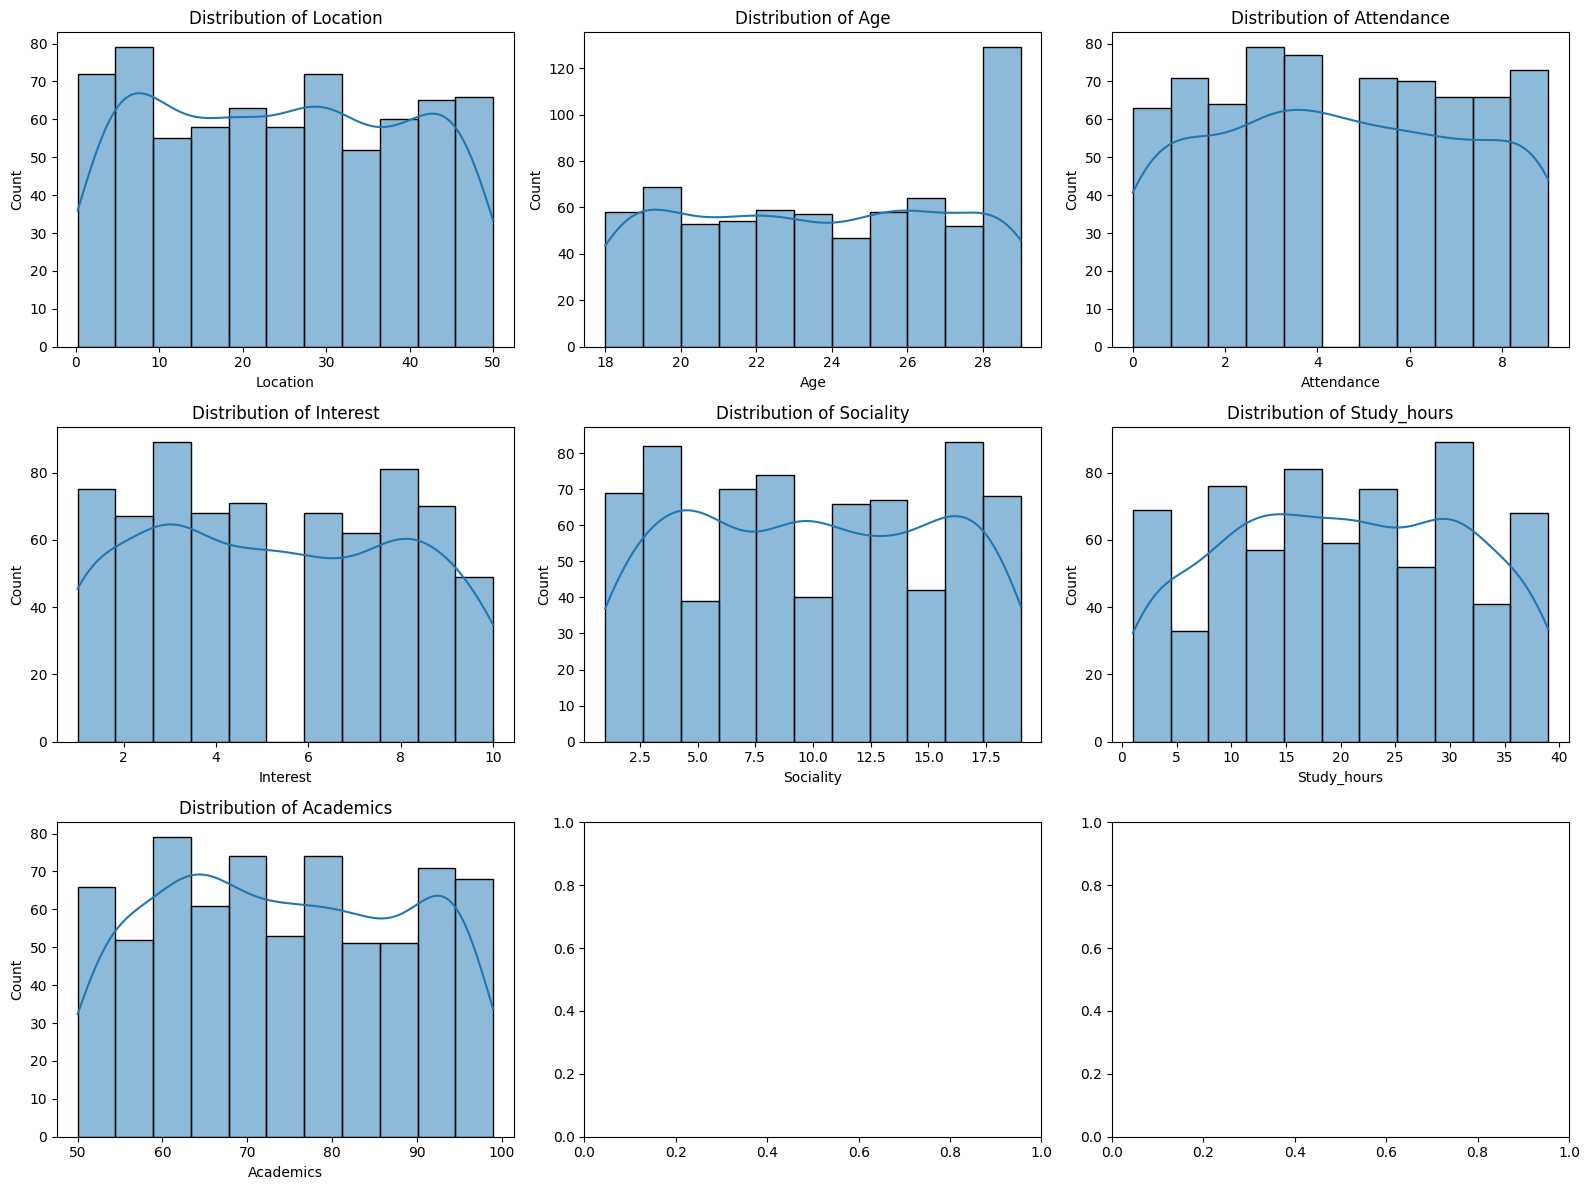

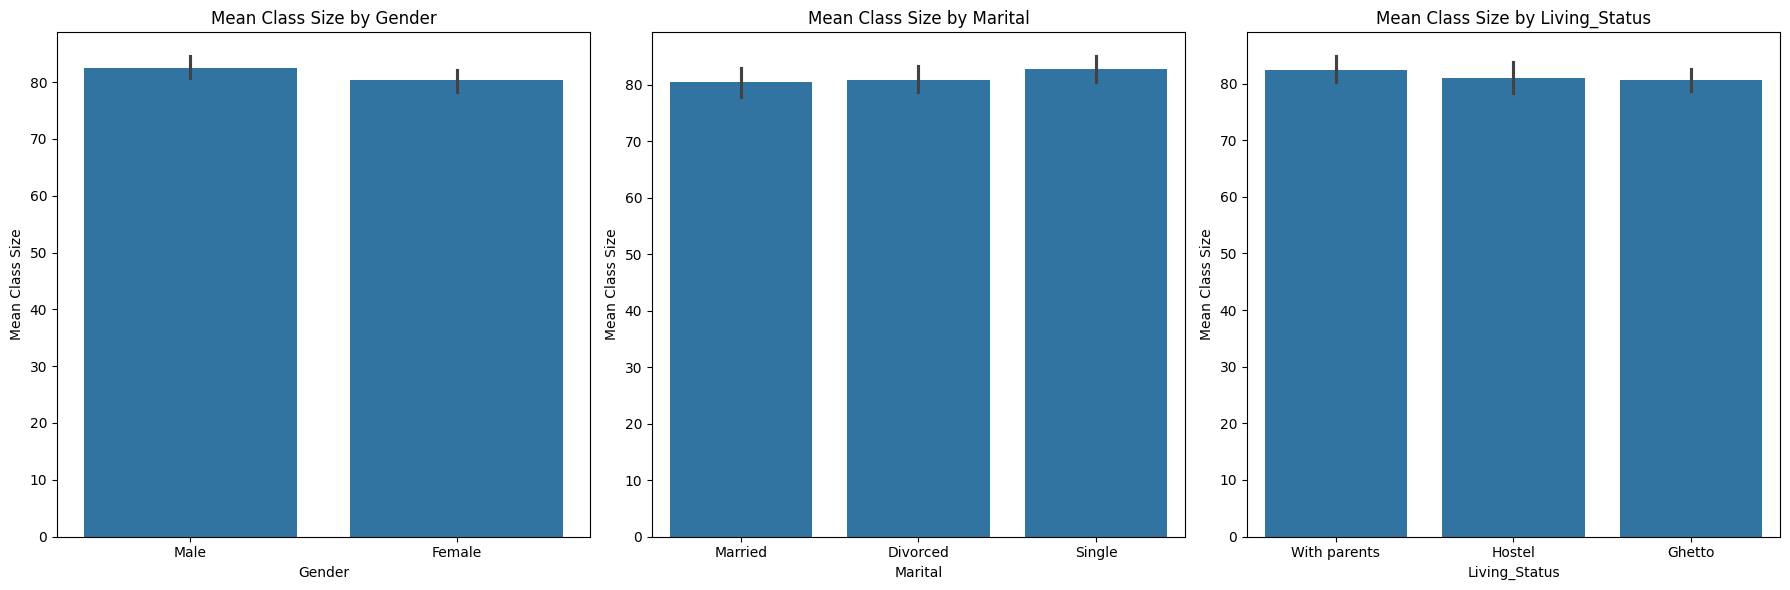

In [30]:
# Plot distributions of numerical features
numerical_features = ['Location', 'Age', 'Attendance', 'Interest', 'Sociality', 'Study_hours', 'Academics']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

fig.tight_layout()
plt.show()






# Plot bar plots for categorical features by Status (Invited vs Not Invited)
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features[:-1]), figsize=(18, 6))

for i, feature in enumerate(categorical_features[:-1]):
    sns.barplot(x=feature, y='Class_Size', data=data, ax=axes[i], estimator=np.mean)
    axes[i].set_title(f'Mean Class Size by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean Class Size')

fig.tight_layout()
plt.show()


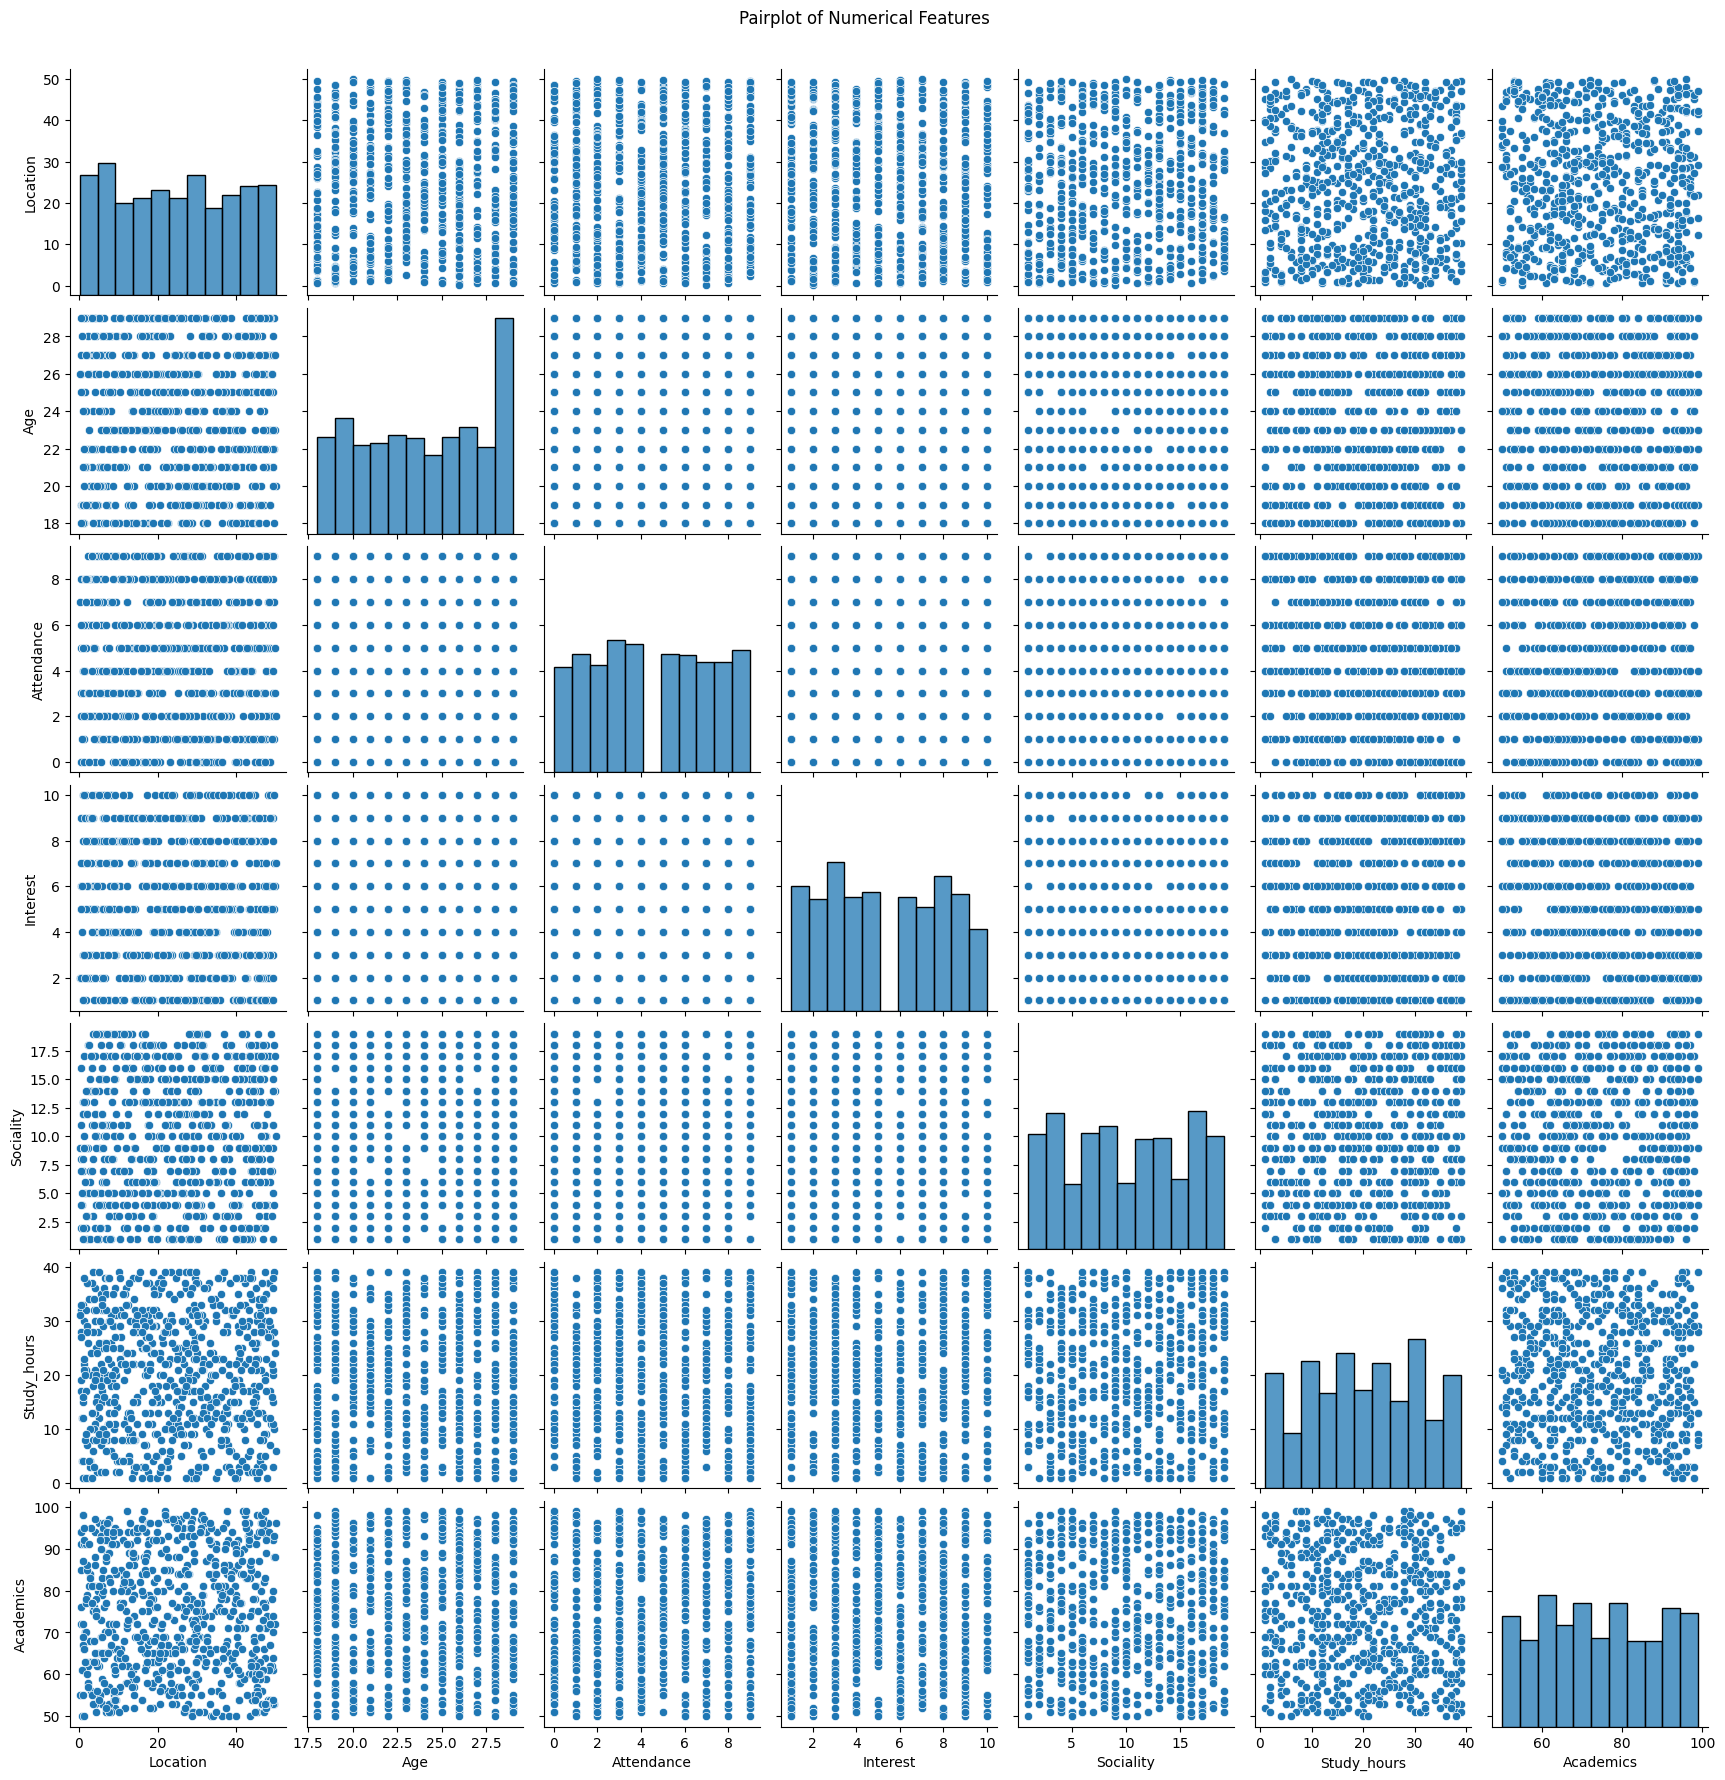

In [31]:
# Plot relationships between numerical features
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


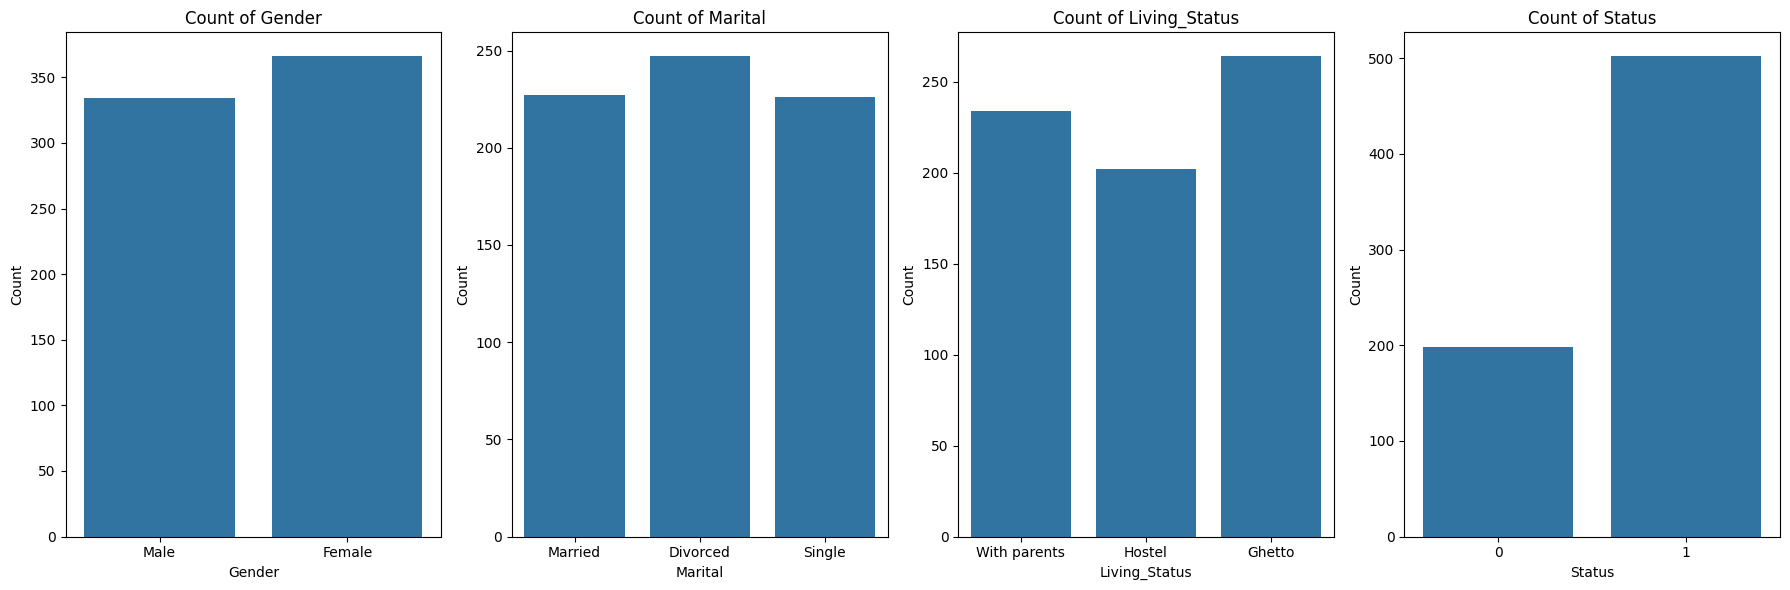

In [32]:
# Plot categorical features
categorical_features = ['Gender', 'Marital', 'Living_Status', 'Status']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(18, 6))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

fig.tight_layout()
plt.show()

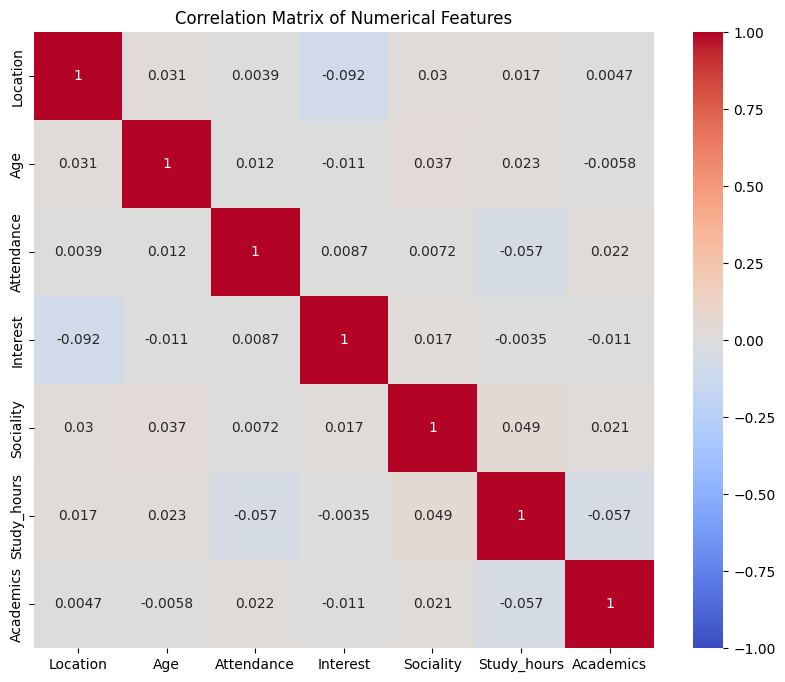

In [33]:

# Plot correlations
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

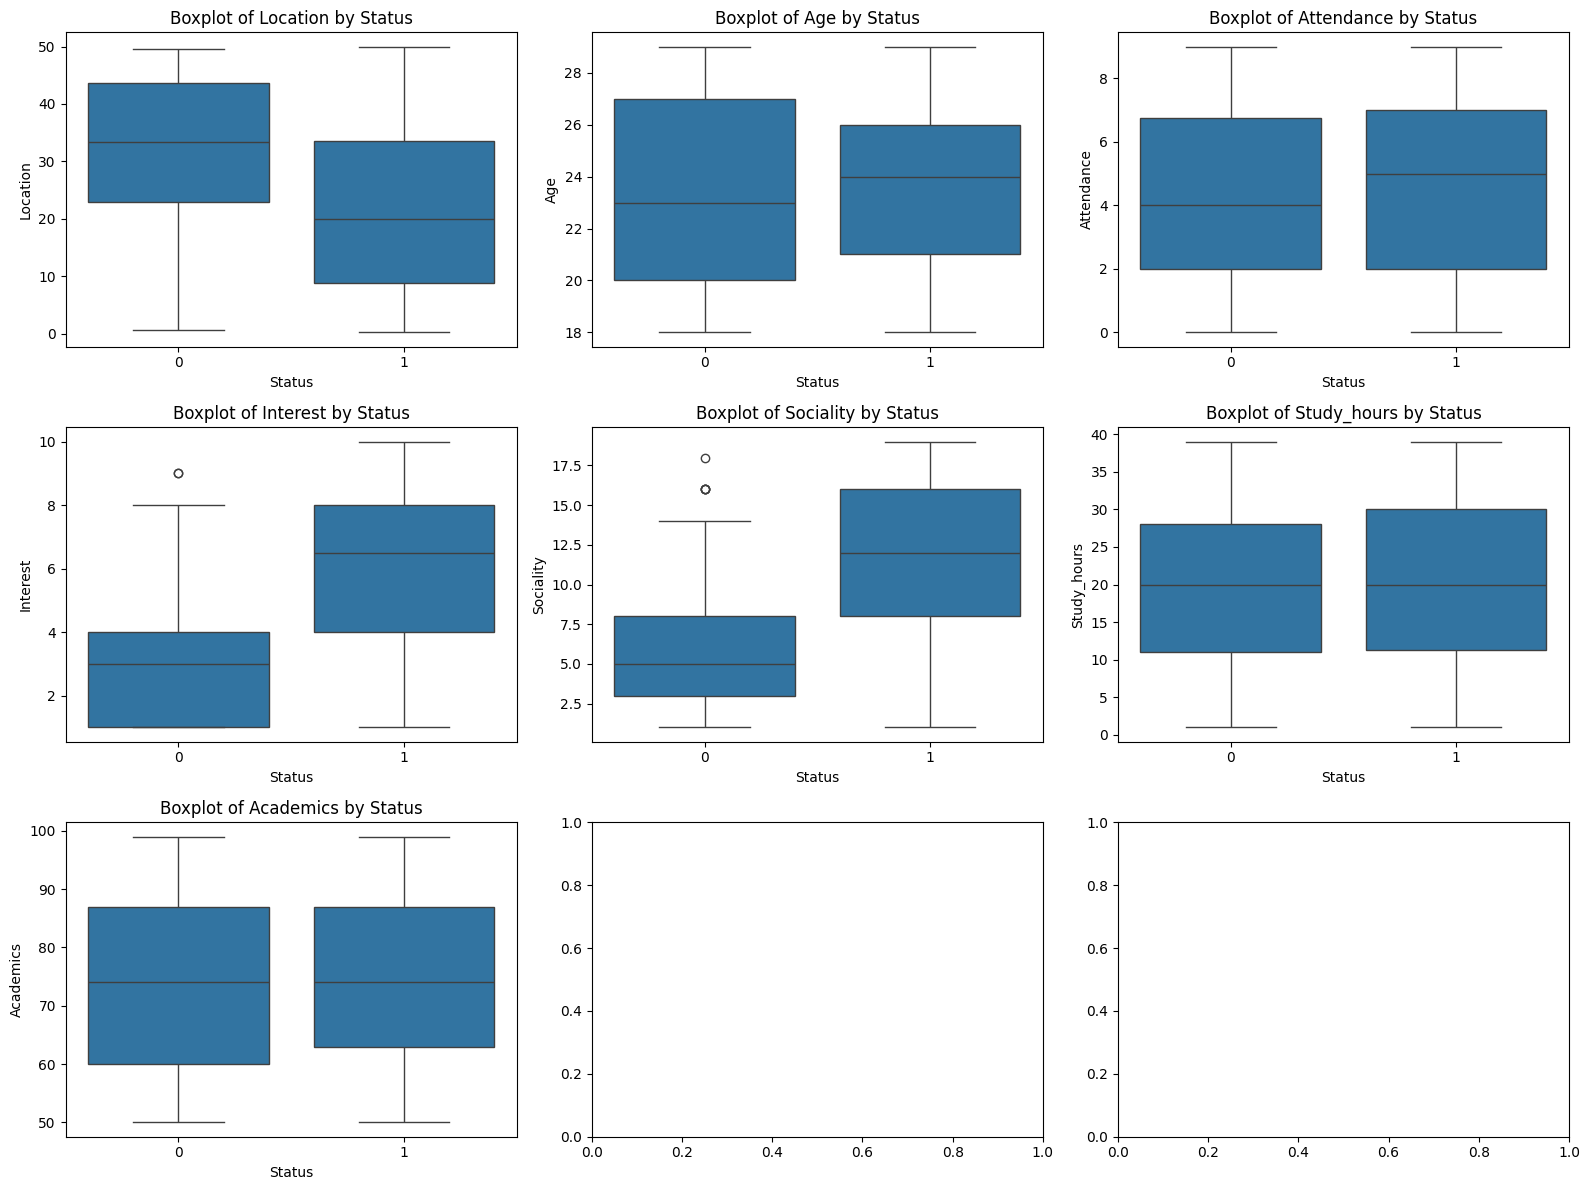

In [34]:
# Plot boxplots for numerical features by Status (Invited vs Not Invited)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Status', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Status')
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(feature)

fig.tight_layout()
plt.show()


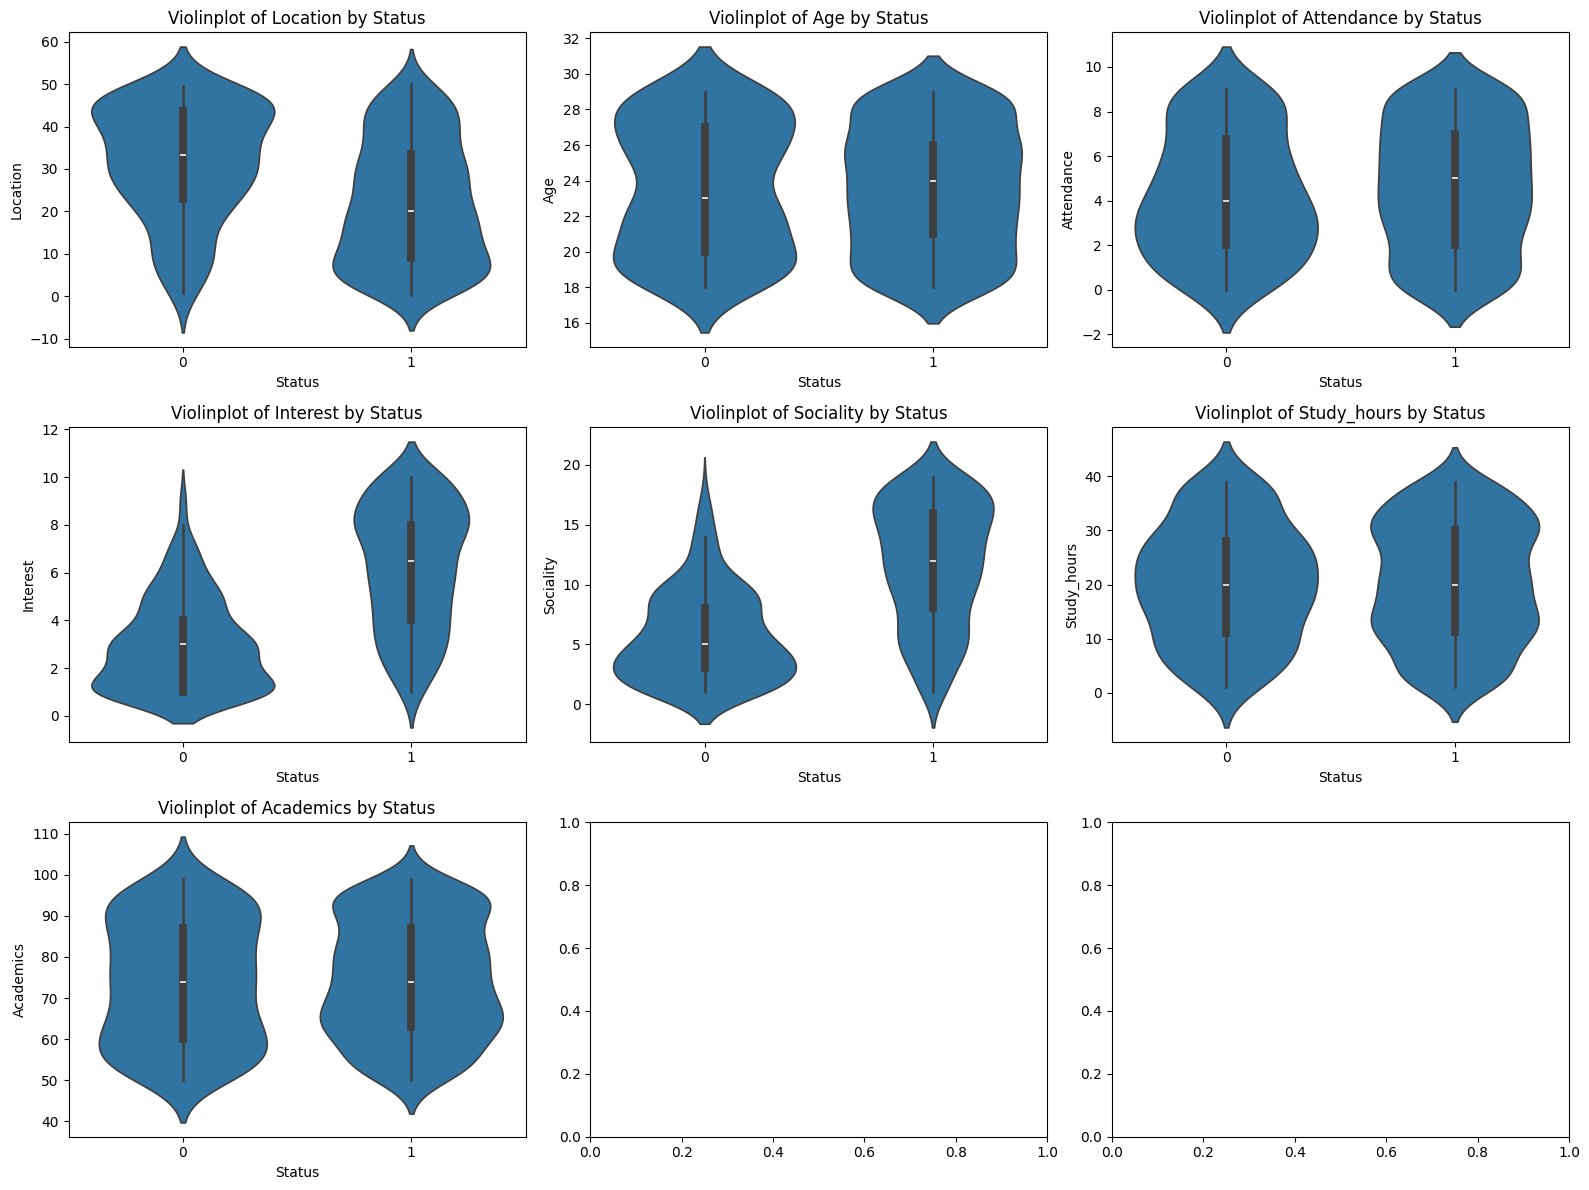

In [35]:

# Plot violin plots for numerical features by Status (Invited vs Not Invited)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.violinplot(x='Status', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Violinplot of {feature} by Status')
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(feature)

fig.tight_layout()
plt.show()


The provided visualizations serve to explore various aspects of the dataset comprehensively. The distribution plots illustrate the spread and central tendencies of numerical features such as 'Location', 'Age', and others, offering insights into their ranges and distributions.

 The pairplot reveals pairwise relationships between these numerical features, highlighting potential correlations or patterns. Count plots depict the distribution of categorical features like 'Gender', 'Marital', and 'Living_Status', offering an understanding of category frequencies. The correlation heatmap provides a clear view of correlations between numerical features, indicating any significant relationships.

 Boxplots and violin plots compare the distributions of numerical features between individuals invited and not invited, helping to discern feature influences. Lastly, bar plots display mean 'Class_Size' across categorical features, shedding light on how these factors potentially impact the outcome variables. Together, these visualizations facilitate a comprehensive exploration and understanding of the dataset's characteristics and relationships.

In [16]:
# Encode the 'Status' column
data['Status'] = data['Status'].map({'Invited': 1, 'Not Invited': 0})

# Define features (X) and target variable (y)
X = data.drop(['Status', 'ID'], axis=1)  # Drop 'Status', 'Class_Size' and 'ID' columns
y = data['Status']

# Display the shapes of X and y
print(X.shape, y.shape)


(700, 11) (700,)


In [ ]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Gender', 'Marital', 'Living_Status'], drop_first=True)

# Display the first few rows of the encoded dataset
print(X.head())


In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['Location', 'Age', 'Attendance', 'Interest', 'Sociality', 'Study_hours', 'Academics']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Display the first few rows of the scaled dataset
print(X.head())


   Location       Age  Attendance  Interest  Sociality  Study_hours  \
0  0.031368  0.127168   -0.184584  0.957174  -0.726686     0.070242   
1  1.231674 -1.285814   -0.537613  0.957174   1.097849    -1.666214   
2  0.559781 -1.003218   -0.890643  0.247029   0.368035     1.532520   
3 -1.124262  1.257555    0.874504  1.667319   1.645209    -1.300645   
4 -1.438019  0.127168    1.580563 -0.818188  -0.909140    -0.203936   

   Academics  Class_Size  Gender_Male  Marital_Married  Marital_Single  \
0  -1.217338   72.842660         True             True           False   
1   1.511626   58.769428        False            False           False   
2  -0.587577   95.779472         True            False           False   
3  -0.587577  109.883585         True            False            True   
4   0.042184   92.344709         True             True           False   

   Living_Status_Hostel  Living_Status_With parents  
0                 False                        True  
1                 Fa

saving the Encoder and scaler before actual training


In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from joblib import dump
import pandas as pd

# Example dataset
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Location': [10.0, 20.0, 15.0, 30.0],
    'Age': [25, 30, 22, 27],
    'Marital': ['Single', 'Married', 'Single', 'Divorced'],
    'Living_Status': ['With parents', 'Hostel', 'Ghetto', 'Hostel'],
    'Attendance': [5, 3, 7, 2],
    'Interest': [8, 6, 7, 9],
    'Sociality': [15, 10, 18, 12],
    'Study_hours': [20, 25, 15, 30],
    'Academics': [80, 85, 75, 90]
}

# Convert data to DataFrame
X = pd.DataFrame(data)

# Identify numerical and categorical columns
numerical_columns = ['Location', 'Age', 'Attendance', 'Interest', 'Sociality', 'Study_hours', 'Academics']
categorical_columns = ['Gender', 'Marital', 'Living_Status']

# Initialize the scaler and encoder
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the scaler on numerical features
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Fit and transform the encoder on categorical features
X_encoded = encoder.fit_transform(X[categorical_columns])

# Get feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Display the first few rows of the encoded categorical data
print(pd.DataFrame(X_encoded, columns=encoded_feature_names).head())

# Save scaler and encoder to files
scaler_file = 'scaler.pkl'
encoder_file = 'encoder.pkl'

dump(scaler, scaler_file)
dump(encoder, encoder_file)

print(f'Scaler saved to {scaler_file}')
print(f'Encoder saved to {encoder_file}')

# Download scaler and encoder files (if using Google Colab)
from google.colab import files
files.download(scaler_file)
files.download(encoder_file)


   Gender_Female  Gender_Male  Marital_Divorced  Marital_Married  \
0            0.0          1.0               0.0              0.0   
1            1.0          0.0               0.0              1.0   
2            0.0          1.0               0.0              0.0   
3            1.0          0.0               1.0              0.0   

   Marital_Single  Living_Status_Ghetto  Living_Status_Hostel  \
0             1.0                   0.0                   0.0   
1             0.0                   0.0                   1.0   
2             1.0                   1.0                   0.0   
3             0.0                   0.0                   1.0   

   Living_Status_With parents  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
Scaler saved to scaler.pkl
Encoder saved to encoder.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SAVING THE DATA BEFORE TRAINING

In [37]:
import pandas as pd
import numpy as np
from google.colab import files  # Ensure you have imported this

# Assuming 'data' is your processed DataFrame

# Save to CSV file
data.to_csv('processed_data.csv', index=False)

# Save to Excel file
data.to_excel('processed_data.xlsx', index=False)

# Download CSV file
files.download('processed_data.csv')

# Download Excel file
files.download('processed_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(560, 13) (140, 13) (560,) (140,)


In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the evaluation results
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logistic)
print("Logistic Regression Classification Report:")
print(class_report_logistic)


Logistic Regression Accuracy: 0.9928571428571429
Logistic Regression Confusion Matrix:
[[ 32   1]
 [  0 107]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      1.00       107

    accuracy                           0.99       140
   macro avg       1.00      0.98      0.99       140
weighted avg       0.99      0.99      0.99       140



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification report from a logistic regression model provides several metrics that assess its performance in predicting classes ('0' for Not Invited and '1' for Invited). Here's how to interpret each metric:

1. **Precision**:
   - Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives).
   - For class '0' (Not Invited): Precision is 1.00, which means all instances predicted as Not Invited were actually Not Invited.
   - For class '1' (Invited): Precision is 0.99, indicating that 99% of instances predicted as Invited were indeed Invited.

2. **Recall (Sensitivity)**:
   - Recall is the ratio of correctly predicted positive observations (true positives) to all observations in the actual class (true positives + false negatives).
   - For class '0' (Not Invited): Recall is 0.97, meaning 97% of actual Not Invited instances were correctly predicted as Not Invited.
   - For class '1' (Invited): Recall is 1.00, indicating that the model correctly identified all instances of Invited.

3. **F1-score**:
   - F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures.
   - For class '0' (Not Invited): F1-score is 0.98, reflecting a balanced performance between precision and recall for predicting Not Invited.
   - For class '1' (Invited): F1-score is 1.00, indicating excellent precision and recall balance in predicting Invited.

4. **Support**:
   - Support is the number of actual occurrences of each class in the dataset (true positives + false negatives).
   - Class '0' has a support of 33 instances, while class '1' has a support of 107 instances.

5. **Accuracy**:
   - Overall accuracy of the model across all classes.
   - Accuracy is 0.99, indicating that the model correctly predicted 99% of the instances in the dataset.

**Interpretation**:
- The high precision and recall scores for both classes ('0' and '1') suggest that the logistic regression model performs very well in predicting whether individuals will be Invited or Not Invited to the party based on their features. Specifically, it shows:
  - For class '0' (Not Invited), the model correctly identifies a high percentage of instances and makes very few false positive predictions.
  - For class '1' (Invited), the model accurately predicts all instances and has excellent precision and recall.
- The overall high F1-score and accuracy further confirm the robustness of the model's predictions. These metrics collectively indicate that the logistic regression model is effective and reliable in its classification task for this dataset.

In [22]:
import joblib

# Save the logistic regression model
joblib_file = "logistic_model.pkl"
joblib.dump(logistic_model, joblib_file)
from google.colab import files

# Download the logistic regression model
files.download(joblib_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

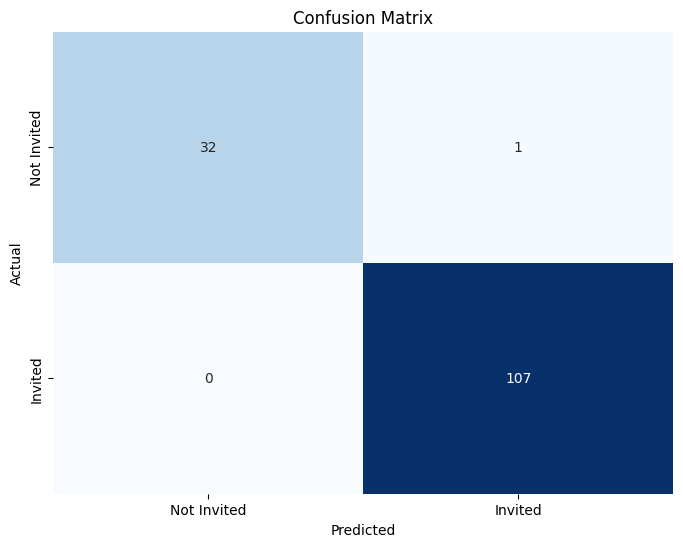

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Not Invited', 'Invited'],
            yticklabels=['Not Invited', 'Invited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The ROC curve visualizes the performance of a binary classifier across various thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity)

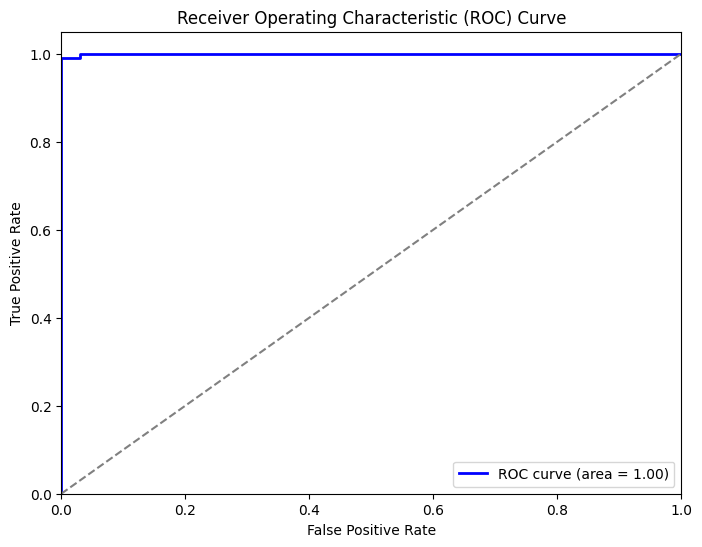

In [24]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


precision recall curve

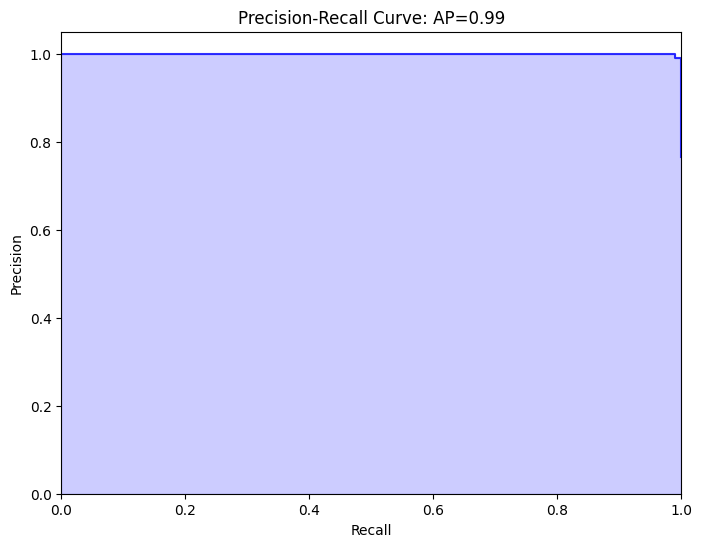

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, y_pred_logistic)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', alpha=0.8)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()


feature coefficiency

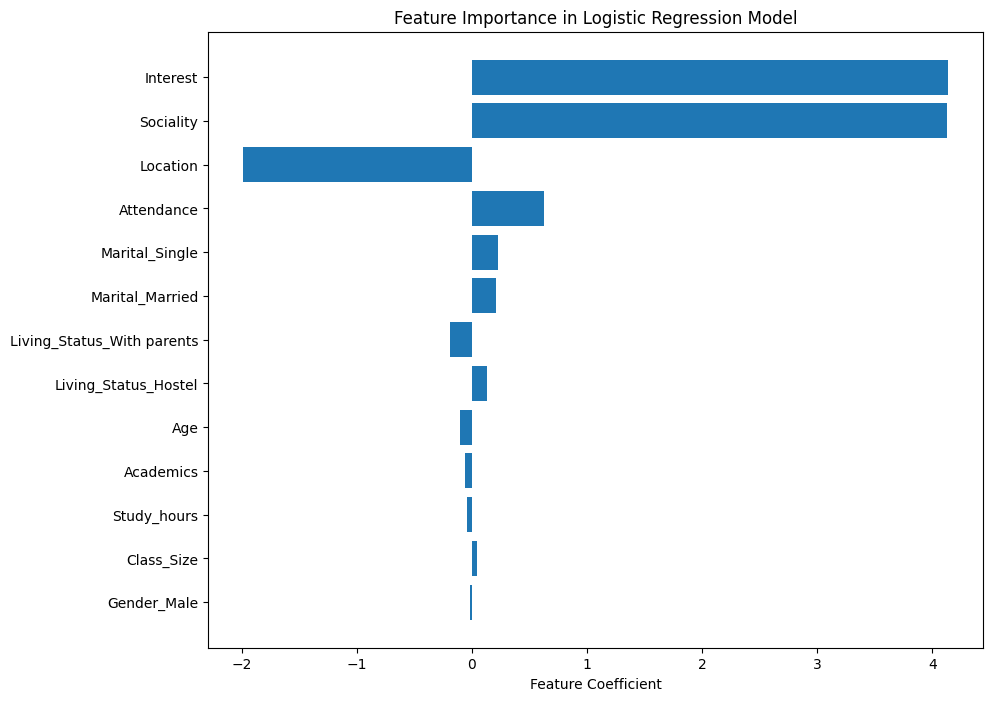

In [26]:
# Extract feature coefficients
feature_importance = logistic_model.coef_[0]
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(np.abs(feature_importance))

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Coefficient')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


Interpretation:
Confusion Matrix: Helps visualize true positive, true negative, false positive, and false negative predictions, providing insights into model accuracy and errors.

ROC Curve: Illustrates the trade-off between sensitivity and specificity across different probability thresholds. A higher area under the curve (AUC) indicates better model performance.

Precision-Recall Curve: Shows the precision-recall trade-off. A model with higher precision at lower recall thresholds is preferred for scenarios where precision is crucial.

Feature Importance: Displays the influence of each feature on the prediction. Positive coefficients indicate a feature increases the likelihood of being invited, while negative coefficients indicate the opposite.

These visualizations collectively help understand the logistic regression model's performance, its predictive capabilities, and the importance of different features in making predictions about party invitations based on the given dataset.








PREDICTION RESULTS FROM THE MODAL

In [28]:
import pandas as pd

# Example data to input manually
input_data = {
    'Location': [10.5, 25.0, 15.3],  # Example values for 'Location' feature
    'Age': [22, 28, 19],             # Example values for 'Age' feature
    'Attendance': [5, 3, 8],         # Example values for 'Attendance' feature
    'Interest': [7, 4, 9],           # Example values for 'Interest' feature
    'Sociality': [15, 10, 18],       # Example values for 'Sociality' feature
    'Study_hours': [25, 30, 15],     # Example values for 'Study_hours' feature
    'Academics': [85, 65, 78],       # Example values for 'Academics' feature
    'Gender': ['Male', 'Female', 'Male'],  # Example values for 'Gender' feature
    'Marital': ['Single', 'Married', 'Single'],  # Example values for 'Marital' feature
    'Living_Status': ['With parents', 'Hostel', 'With parents']  # Example values for 'Living_Status' feature
}

# Create a DataFrame for the input data
input_df = pd.DataFrame(input_data)

# Preprocess the input data
input_df = pd.get_dummies(input_df, columns=['Gender', 'Marital', 'Living_Status'], drop_first=True)

# Ensure all columns exist in the input data
# Add missing columns with default value 0 if necessary
missing_cols = set(X.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# Reorder columns to match training data
input_df = input_df[X.columns]

# Scale numerical features
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Make predictions
predictions = logistic_model.predict(input_df)

# Convert probabilities to classes based on a threshold (0.5)
predicted_classes = ['Invited' if pred == 1 else 'Not Invited' for pred in predictions]

# Print the predicted classes
print(predicted_classes)


['Invited', 'Not Invited', 'Invited']


BUILDING THE USER INETRFACE USING STREAMLIN FRAMEWORK

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
# Import joblib from the correct module
from joblib import load

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Paths to your saved model and preprocessing objects
model_path = 'logistic_model.pkl'
scaler_path = 'scaler.pkl'
encoder_path = 'encoder.pkl'

# Loading trained model (logistic_model) and preprocessing objects
logistic_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
encoder = joblib.load(encoder_path)

# Define function for data preprocessing
def preprocess_input(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame(input_data, index=[0])

    # Perform preprocessing steps similar to what you did during training
    # Example: One-hot encoding for categorical variables
    categorical_cols = ['Gender', 'Marital', 'Living_Status']
    input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols)

    # Example: Scaling numerical variables
    numerical_cols = ['Location', 'Age', 'Attendance', 'Interest', 'Sociality', 'Study_hours', 'Academics']
    input_df_scaled = scaler.transform(input_df_encoded[numerical_cols])
    input_df_encoded[numerical_cols] = input_df_scaled

    return input_df_encoded

# Define the Streamlit app function
def main():
    st.title('Party Invitation Predictor')

    # Input fields for user details
    st.subheader('Enter Your Details')
    gender = st.radio('Gender', ['Male', 'Female'])
    location = st.slider('Location Distance (km)', 0.0, 50.0, 25.0)
    age = st.slider('Age', 18, 30, 25)
    attendance = st.slider('Previous Party Attendance', 0, 10, 5)
    interest = st.slider('Interest Level (1-10)', 1, 10, 5)
    sociality = st.slider('Social Group Size', 1, 20, 10)
    study_hours = st.slider('Weekly Study Hours', 1, 40, 20)
    academics = st.slider('Academic Performance (0-100)', 50, 100, 75)
    marital_status = st.selectbox('Marital Status', ['Single', 'Married', 'Divorced'])
    living_status = st.selectbox('Living Status', ['With parents', 'Ghetto', 'Hostel'])

    # Predict button
    if st.button('Predict Invitation Status'):
        # Create dictionary with user inputs
        input_data = {
            'Gender': gender,
            'Location': location,
            'Age': age,
            'Attendance': attendance,
            'Interest': interest,
            'Sociality': sociality,
            'Study_hours': study_hours,
            'Academics': academics,
            'Marital': marital_status,
            'Living_Status': living_status
        }

        # Preprocess input data
        input_df = preprocess_input(input_data)

        # Make prediction using the loaded model
        prediction = logistic_model.predict(input_df)

        # Display prediction result
        if prediction[0] == 1:
            st.success('You are Invited!')
        else:
            st.warning('You are Not Invited.')

# Run the Streamlit app
if __name__ == '__main__':
    main()
